In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-csv/pima-indians-diabetes.csv


## Load the data

In [2]:
import tensorflow as tf
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

2025-11-19 08:00:04.385825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763539204.662025      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763539204.737402      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

### We are using indias latest diabetes data
- Number of times pregnant
- Plasma glucose concentration at 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
  
These are the features of the dataset

In [3]:
# as there is no column name we cannot import it like this

# df = pd.read_csv("/kaggle/input/pima-indians-diabetes-csv/pima-indians-diabetes.csv")

In [4]:
# df.head()

#### There is a othre method to import these kind of dataset

In [5]:
dataset = loadtxt("/kaggle/input/pima-indians-diabetes-csv/pima-indians-diabetes.csv", delimiter=',')

In [6]:
dataset[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ,   1.   ])

### Splitting the data as features and targets for the model to predict

In [7]:
# this is if the data is fetched using pandas

# X = df.iloc[:, 0:8]
# y = df.iloc[:, 8]

In [8]:
X = dataset[:, 0:8]
y = dataset[:, 8]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state = 42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

##  define the keras model

In [11]:
model = Sequential([
    Dense(12, input_shape = (8, ), activation='relu'),
    Dense(8, activation='relu'),
    # Output layer
    Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

2025-11-19 08:00:23.669292: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
model.fit(X_train, y_train, epochs = 150, batch_size = 10)

Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3740 - loss: 3.9822
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4504 - loss: 1.4357
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5628 - loss: 0.9639
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6055 - loss: 0.8139
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6228 - loss: 0.7155
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - loss: 0.6845
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - loss: 0.7068
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 0.6759
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - loss: 0.6701
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.6844
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.6741
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [13]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 71.43


In [14]:
pred = model.predict(X_test)
rounded = [round(x[0]) for x in pred]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [15]:
predictions = (model.predict(X_test) > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [16]:
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

cf = classification_report(y_test, predictions)
cf
cm = confusion_matrix(y_test, predictions)

<Axes: >

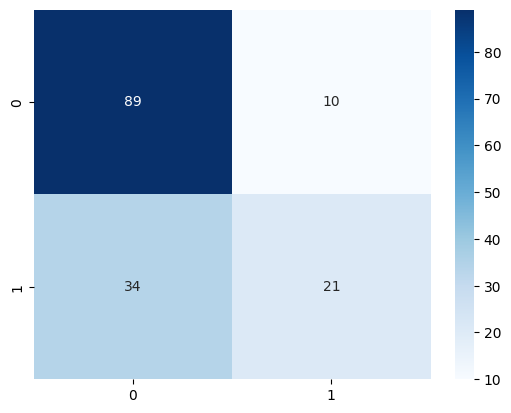

In [18]:
import seaborn as sns

sns.heatmap(cm, cmap = "Blues", annot=True)